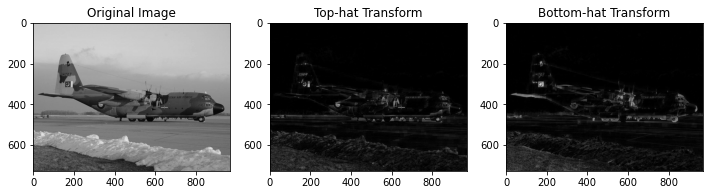

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def complex_top_hat_bottom_hat(image, kernel_type='ellipse', kernel_size=15):
    """
    Applies complex top-hat and bottom-hat transformations with varying
    structuring elements for greater flexibility.

    Args:
        image (numpy.ndarray): The input grayscale image.
        kernel_type (str): Type of structuring element ('rect', 'ellipse', 'cross').
                           Defaults to 'ellipse'.
        kernel_size (int): Size of the structuring element. Defaults to 15.

    Returns:
        tuple: (top_hat_transformed, bottom_hat_transformed)
    """

    # Create structuring element 
    if kernel_type == 'rect':
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size, kernel_size))
    elif kernel_type == 'ellipse':
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))
    elif kernel_type == 'cross':
        kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (kernel_size, kernel_size))
    else:
        raise ValueError("Invalid kernel_type. Use 'rect', 'ellipse', or 'cross'")

    # Top-hat transform
    top_hat = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel)

    # Bottom-hat transform
    bottom_hat = cv2.morphologyEx(image, cv2.MORPH_BLACKHAT, kernel)

    return top_hat, bottom_hat

# Load the image
image = cv2.imread('c130.jpg', cv2.IMREAD_GRAYSCALE)
if image is None:
    raise FileNotFoundError("Image 'c130.jpg' not found. Check the path.")

# Perform complex top-hat and bottom-hat transformations
top_hat, bottom_hat = complex_top_hat_bottom_hat(image, kernel_type='rect', kernel_size=15)

# Visualization
fig, axs = plt.subplots(1, 3, figsize=(12, 5))
axs[0].imshow(image, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Original Image')
axs[1].imshow(top_hat, cmap='gray', vmin=0, vmax=255)
axs[1].set_title('Top-hat Transform')
axs[2].imshow(bottom_hat, cmap='gray', vmin=0, vmax=255)
axs[2].set_title('Bottom-hat Transform')
plt.show()


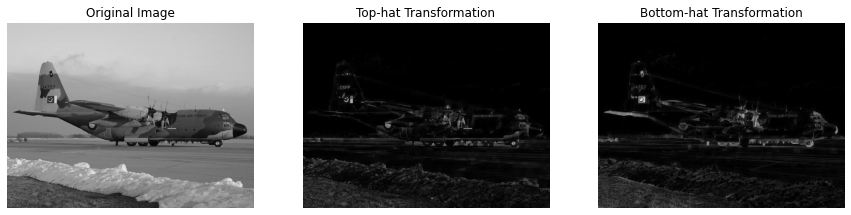

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Function to read and convert image to grayscale
def read_and_convert_image(image_path):
    # Read the image
    image = cv2.imread(image_path)
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray_image

# Function to apply Top-hat transformation
def apply_top_hat(gray_image, kernel_size=15):
    # Define the structuring element
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size, kernel_size))
    # Apply the Top-hat transformation
    top_hat = cv2.morphologyEx(gray_image, cv2.MORPH_TOPHAT, kernel)
    return top_hat

# Function to apply Bottom-hat transformation
def apply_bottom_hat(gray_image, kernel_size=15):
    # Define the structuring element
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size, kernel_size))
    # Apply the Bottom-hat transformation
    bottom_hat = cv2.morphologyEx(gray_image, cv2.MORPH_BLACKHAT, kernel)
    return bottom_hat

# Function to visualize the original and modified images
def visualize_results(original_image, top_hat_image, bottom_hat_image):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(top_hat_image, cmap='gray')
    plt.title('Top-hat Transformation')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(bottom_hat_image, cmap='gray')
    plt.title('Bottom-hat Transformation')
    plt.axis('off')

    plt.show()

# Main code
if __name__ == "__main__":
    image_path = 'c130.jpg'  # Image path
    gray_image = read_and_convert_image(image_path)  # Convert image to grayscale
    top_hat_image = apply_top_hat(gray_image)  # Apply Top-hat transformation
    bottom_hat_image = apply_bottom_hat(gray_image)  # Apply Bottom-hat transformation

    # Visualize the original and modified images
    visualize_results(gray_image, top_hat_image, bottom_hat_image)
